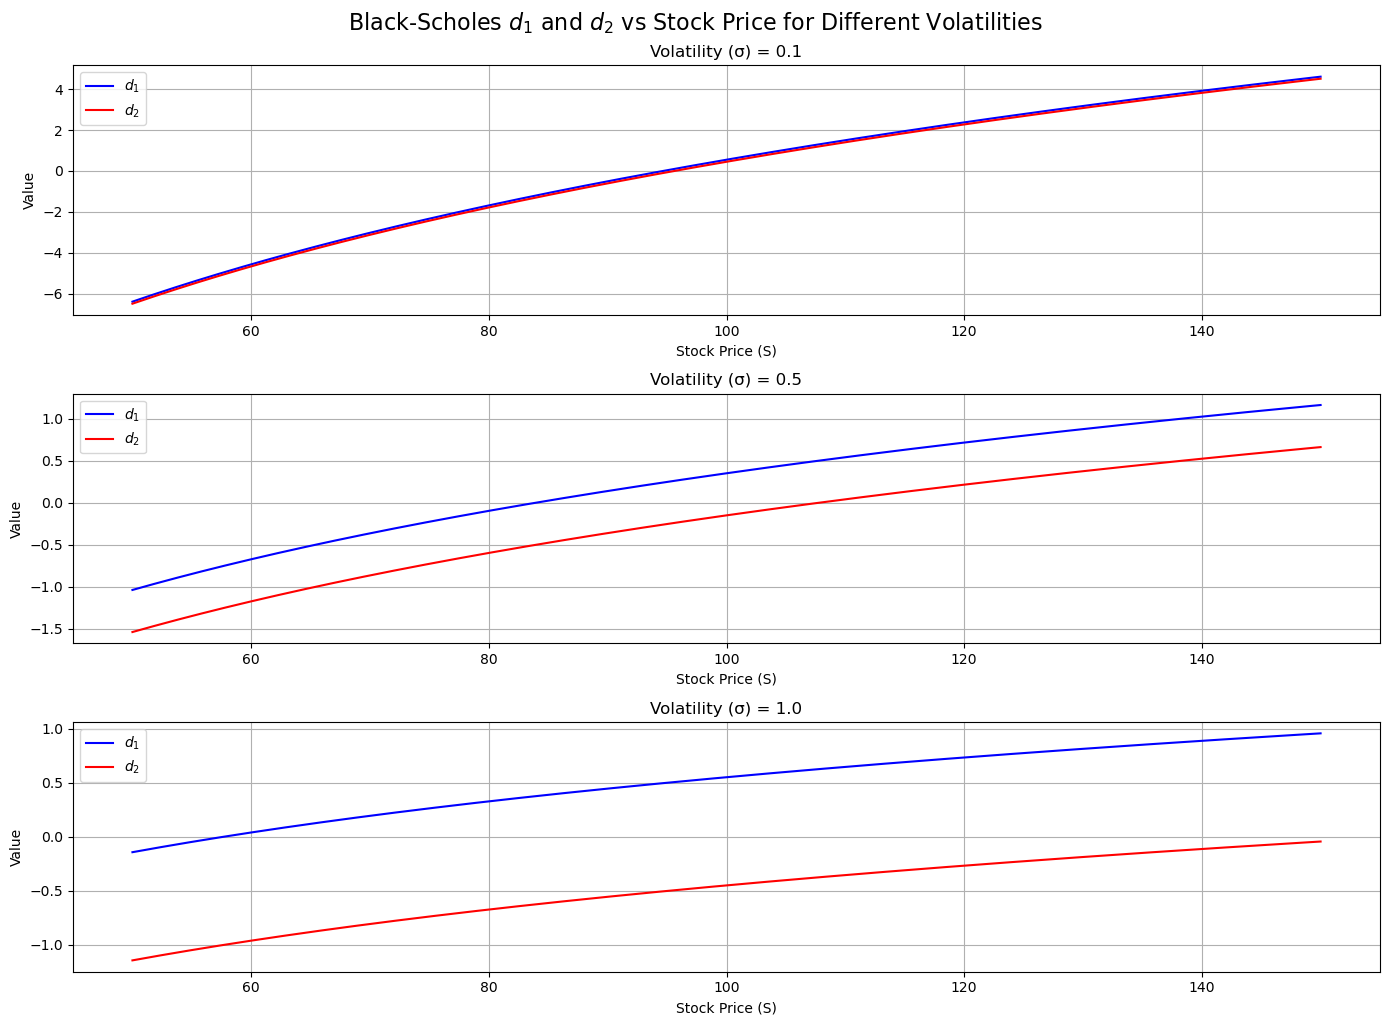

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
K = 100        # Strike price
r = 0.05       # Risk-free interest rate
T = 1          # Time to maturity (in years)
volatilities = [0.1, 0.5, 1.0]  # Different volatilities
S = np.linspace(50, 150, 500)   # Stock price range

# Create plots for each volatility
plt.figure(figsize=(14, 10))

for i, sigma in enumerate(volatilities):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    plt.subplot(3, 1, i+1)
    plt.plot(S, d1, label=r"$d_1$", color='blue')
    plt.plot(S, d2, label=r"$d_2$", color='red')
    plt.title(f"Volatility (σ) = {sigma}")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle("Black-Scholes $d_1$ and $d_2$ vs Stock Price for Different Volatilities", fontsize=16, y=1.02)
plt.show()


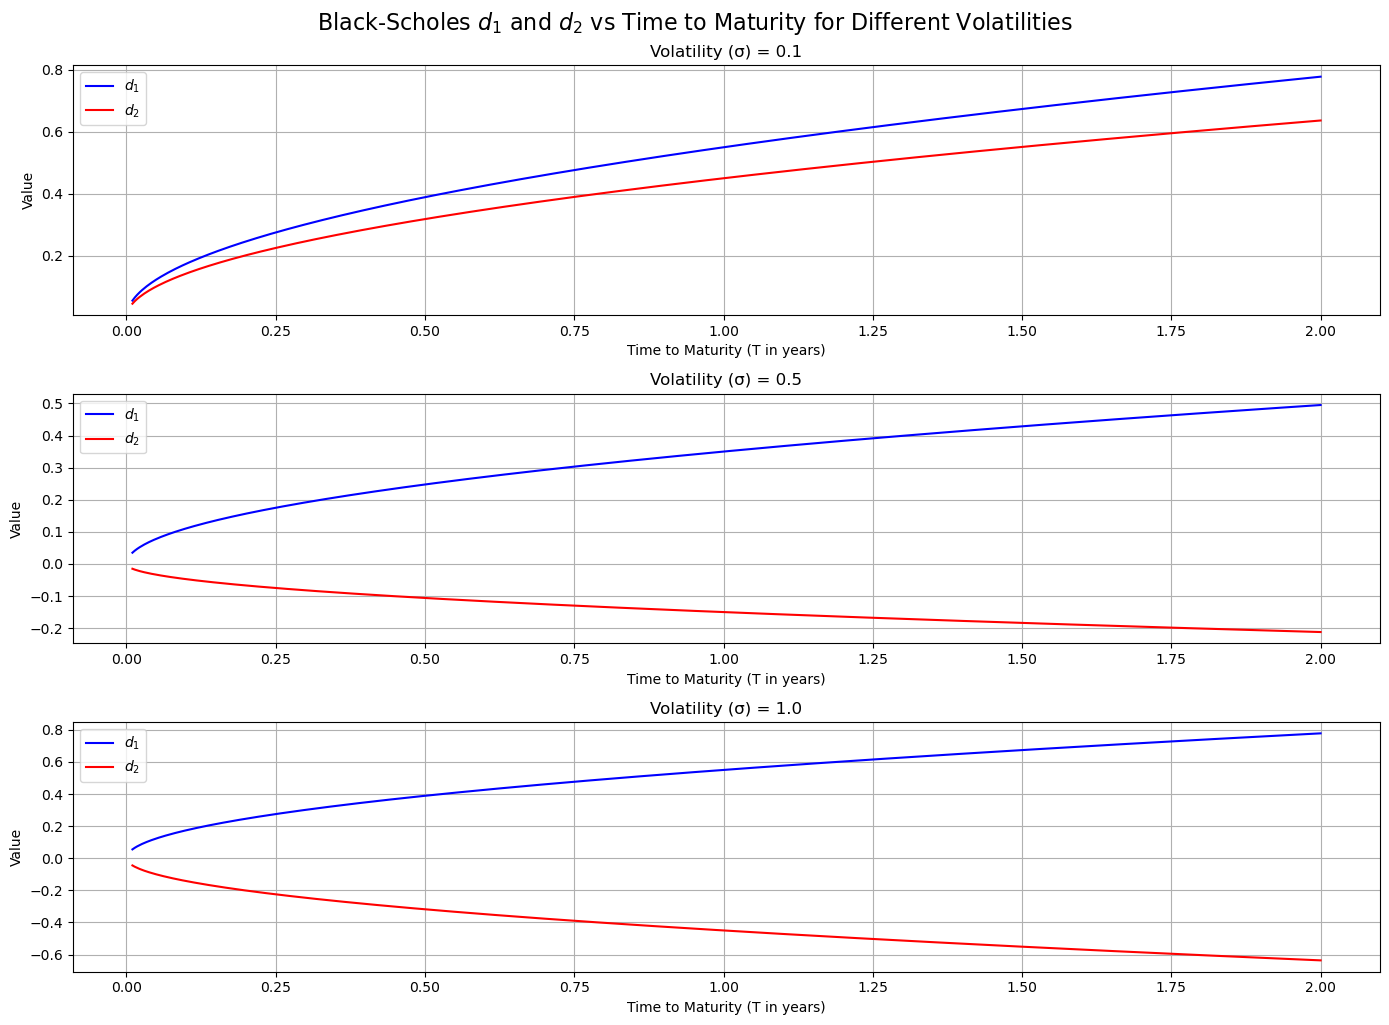

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
S = 100        # Stock price
K = 100        # Strike price
r = 0.05       # Risk-free rate
volatilities = [0.1, 0.5, 1.0]  # High contrast volatilities
T = np.linspace(0.01, 2.0, 500) # Time to maturity from 0.01 to 2 years

# Create plots for each volatility
plt.figure(figsize=(14, 10))

for i, sigma in enumerate(volatilities):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    plt.subplot(3, 1, i+1)
    plt.plot(T, d1, label=r"$d_1$", color='blue')
    plt.plot(T, d2, label=r"$d_2$", color='red')
    plt.title(f"Volatility (σ) = {sigma}", fontsize=12)
    plt.xlabel("Time to Maturity (T in years)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle("Black-Scholes $d_1$ and $d_2$ vs Time to Maturity for Different Volatilities", fontsize=16, y=1.02)
plt.show()


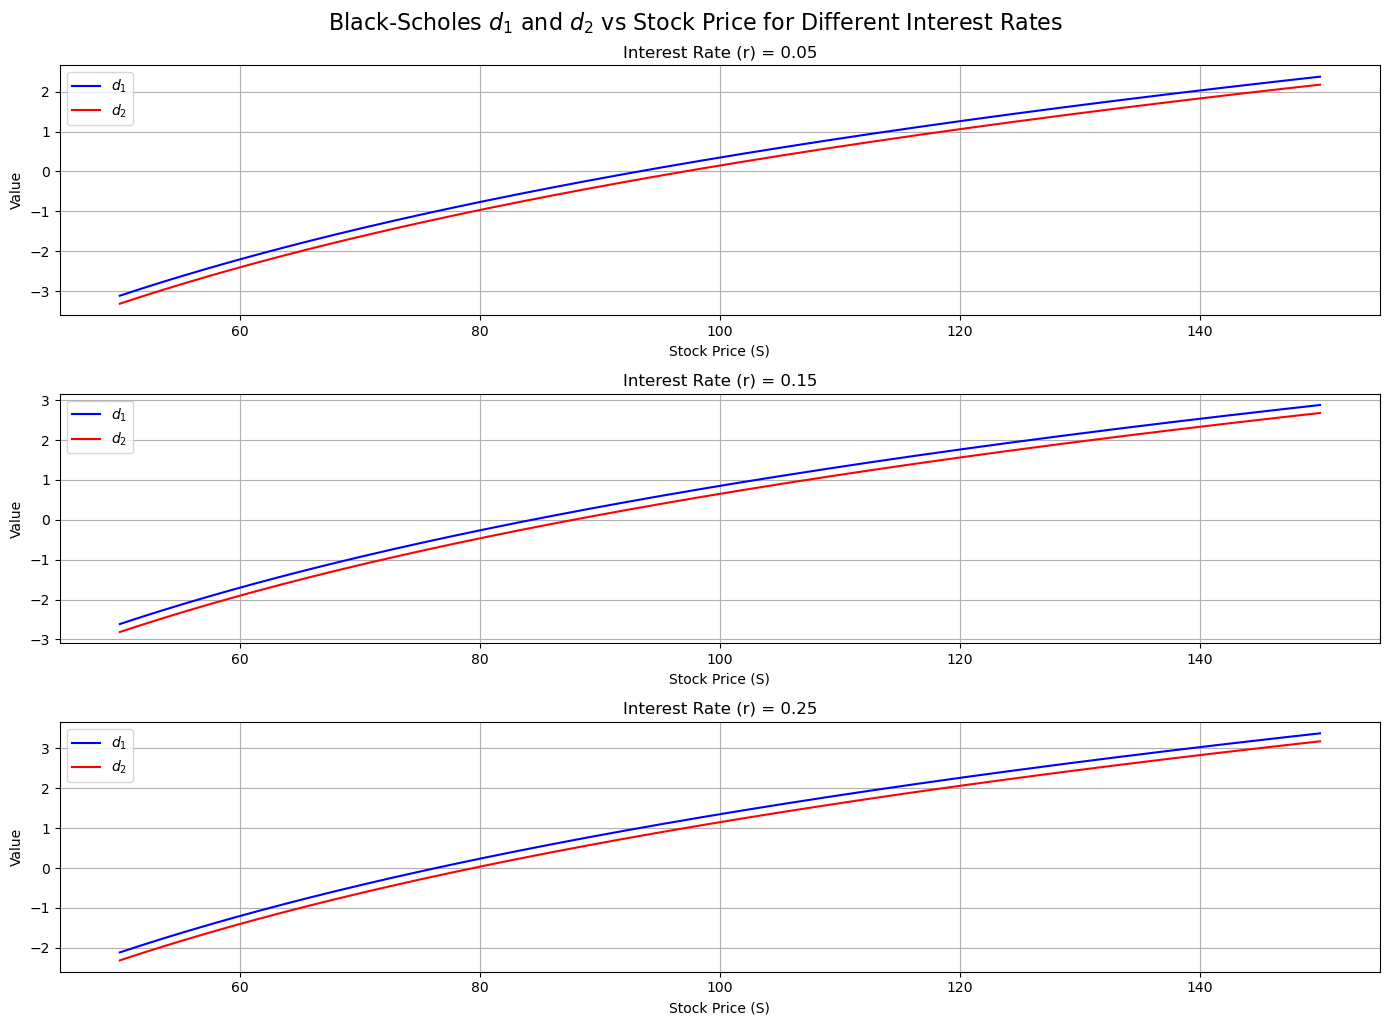

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
K = 100        # Strike price
T = 1          # Time to maturity (in years)
sigma = 0.2    # Fixed volatility
rates = [0.05, 0.15, 0.25]  # Different interest rates
S = np.linspace(50, 150, 500)  # Stock price range

# Create plots for each interest rate
plt.figure(figsize=(14, 10))

for i, r in enumerate(rates):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    plt.subplot(3, 1, i+1)
    plt.plot(S, d1, label=r"$d_1$", color='blue')
    plt.plot(S, d2, label=r"$d_2$", color='red')
    plt.title(f"Interest Rate (r) = {r}", fontsize=12)
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle("Black-Scholes $d_1$ and $d_2$ vs Stock Price for Different Interest Rates", fontsize=16, y=1.02)
plt.show()


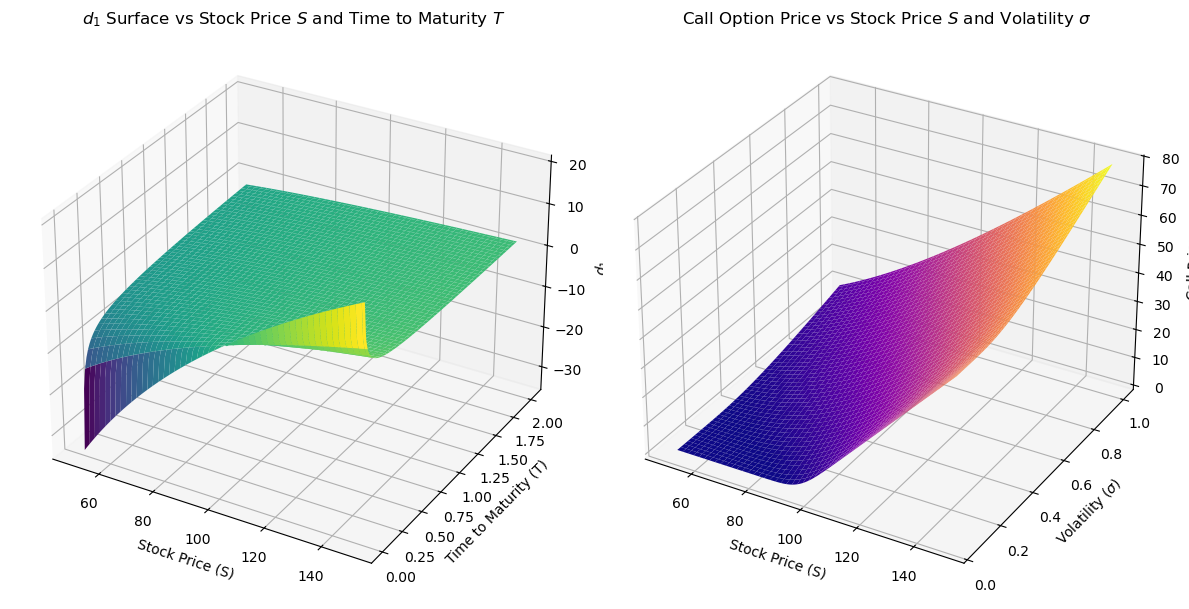

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Constants
K = 100
r = 0.05

# Mesh grid for S and T (for d1)
S_vals = np.linspace(50, 150, 100)
T_vals = np.linspace(0.01, 2.0, 100)
S_grid, T_grid = np.meshgrid(S_vals, T_vals)
sigma_fixed = 0.2

# Calculate d1 over the grid
d1_grid = (np.log(S_grid/K) + (r + 0.5 * sigma_fixed**2) * T_grid) / (sigma_fixed * np.sqrt(T_grid))

# Plot d1 Surface
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(S_grid, T_grid, d1_grid, cmap='viridis')
ax.set_title(r"$d_1$ Surface vs Stock Price $S$ and Time to Maturity $T$")
ax.set_xlabel("Stock Price (S)")
ax.set_ylabel("Time to Maturity (T)")
ax.set_zlabel(r"$d_1$")

# Mesh grid for S and sigma (for call price)
S_vals2 = np.linspace(50, 150, 100)
sigma_vals = np.linspace(0.05, 1.0, 100)
S_grid2, sigma_grid = np.meshgrid(S_vals2, sigma_vals)
T_fixed = 1.0

# Compute d1 and d2 for option pricing
d1_opt = (np.log(S_grid2/K) + (r + 0.5 * sigma_grid**2) * T_fixed) / (sigma_grid * np.sqrt(T_fixed))
d2_opt = d1_opt - sigma_grid * np.sqrt(T_fixed)

# Compute call option prices
call_price = S_grid2 * norm.cdf(d1_opt) - K * np.exp(-r*T_fixed) * norm.cdf(d2_opt)

# Plot Call Price Surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(S_grid2, sigma_grid, call_price, cmap='plasma')
ax2.set_title("Call Option Price vs Stock Price $S$ and Volatility $\\sigma$")
ax2.set_xlabel("Stock Price (S)")
ax2.set_ylabel("Volatility ($\\sigma$)")
ax2.set_zlabel("Call Price")

plt.tight_layout()
plt.show()


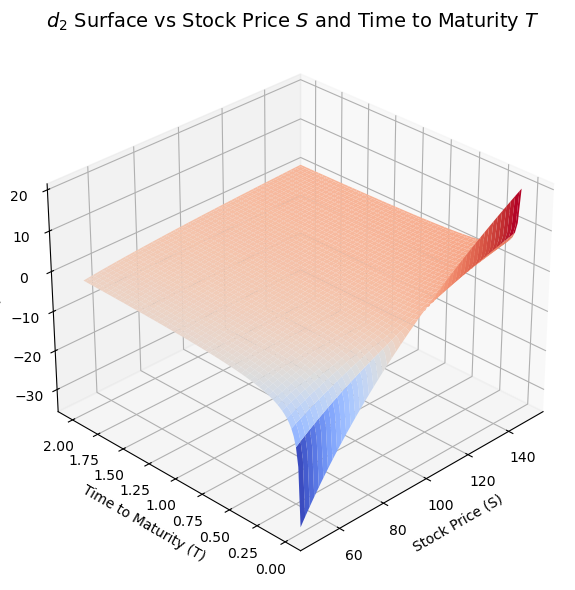

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
K = 100
r = 0.05
sigma = 0.2  # Fixed volatility

# Grid for S and T
S_vals = np.linspace(50, 150, 100)
T_vals = np.linspace(0.01, 2.0, 100)
S_grid, T_grid = np.meshgrid(S_vals, T_vals)

# Compute d1
d1 = (np.log(S_grid/K) + (r + 0.5 * sigma**2) * T_grid) / (sigma * np.sqrt(T_grid))
# Compute d2
d2 = d1 - sigma * np.sqrt(T_grid)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_grid, T_grid, d2, cmap='coolwarm')

ax.set_title(r"$d_2$ Surface vs Stock Price $S$ and Time to Maturity $T$", fontsize=14)
ax.set_xlabel("Stock Price (S)")
ax.set_ylabel("Time to Maturity (T)")
ax.set_zlabel(r"$d_2$")
ax.view_init(elev=30, azim=225)  # Optional: set a better view angle

plt.tight_layout()
plt.show()


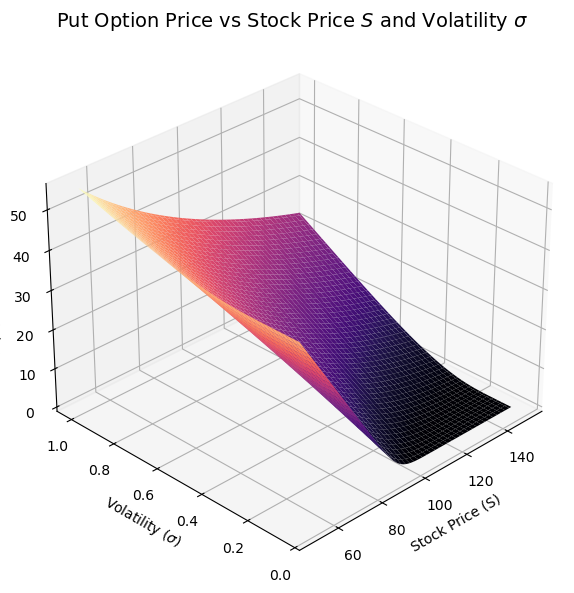

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Constants
K = 100
r = 0.05
T = 1.0  # Fixed maturity

# Meshgrid for S and sigma
S_vals = np.linspace(50, 150, 100)
sigma_vals = np.linspace(0.05, 1.0, 100)
S_grid, sigma_grid = np.meshgrid(S_vals, sigma_vals)

# d1 and d2
d1 = (np.log(S_grid/K) + (r + 0.5 * sigma_grid**2) * T) / (sigma_grid * np.sqrt(T))
d2 = d1 - sigma_grid * np.sqrt(T)

# Put option price
put_price = K * np.exp(-r*T) * norm.cdf(-d2) - S_grid * norm.cdf(-d1)

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_grid, sigma_grid, put_price, cmap='magma')

ax.set_title("Put Option Price vs Stock Price $S$ and Volatility $\\sigma$", fontsize=14)
ax.set_xlabel("Stock Price (S)")
ax.set_ylabel("Volatility ($\\sigma$)")
ax.set_zlabel("Put Option Price")
ax.view_init(elev=30, azim=225)

plt.tight_layout()
plt.show()
